# Визуальный анализ

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(dplyr)
library(ggplot2)

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
music <- read.csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1jZOQHZGmhdTclFNAW4NGFHAOxP8KHB5B', header = TRUE)
music <- music[music$duration_ms >0, ]
music <- na.omit(music)
music <- sample_n(music, 30000)

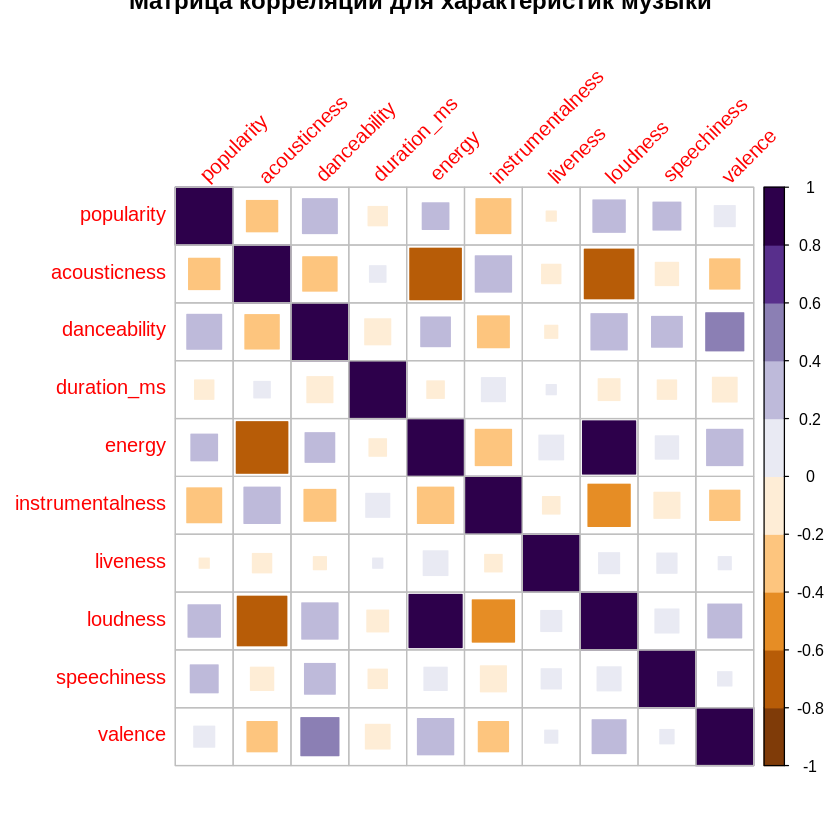

In [ ]:
music_frame <- music
cor_matrix <- round(cor(music_frame[c('popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence')], use = "complete.obs"), 2)
corrplot(cor_matrix, title = 'Матрица корреляции для характеристик музыки', method="square", tl.srt=45, col=COL2("PuOr",10))

Выводы

Ярко выраженную положительную корреляцию можно увидеть между параметрами loudness и energy

Ярко выраженную отрицательную корреляцию имеют пары параметров:

"energy" и "acousticness" "loudness" и "acousticness" "loudness" и "instrumentalness"

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

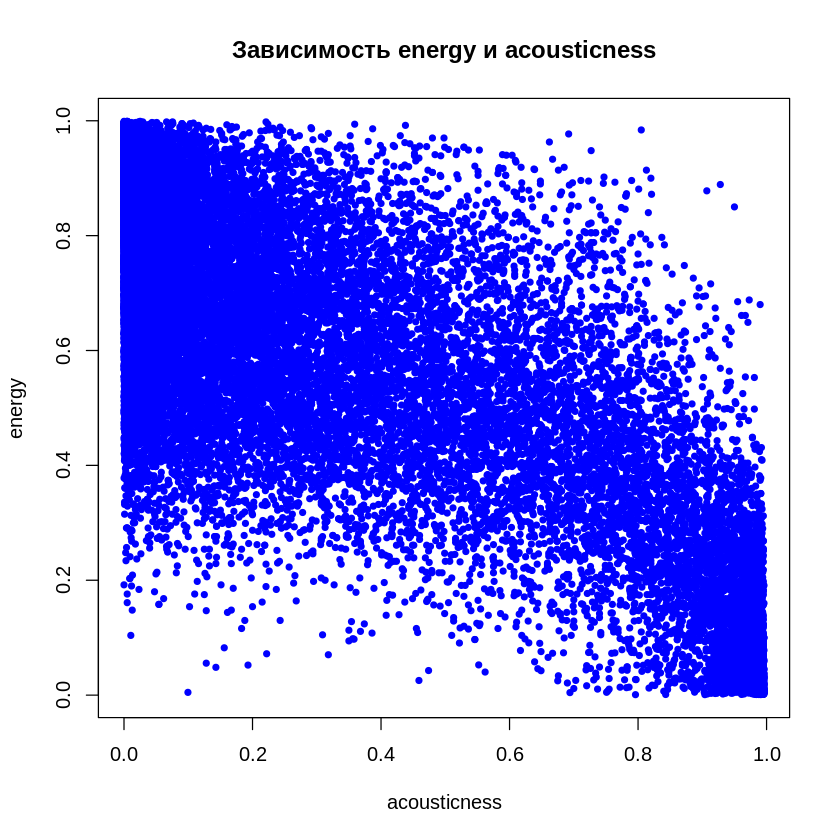

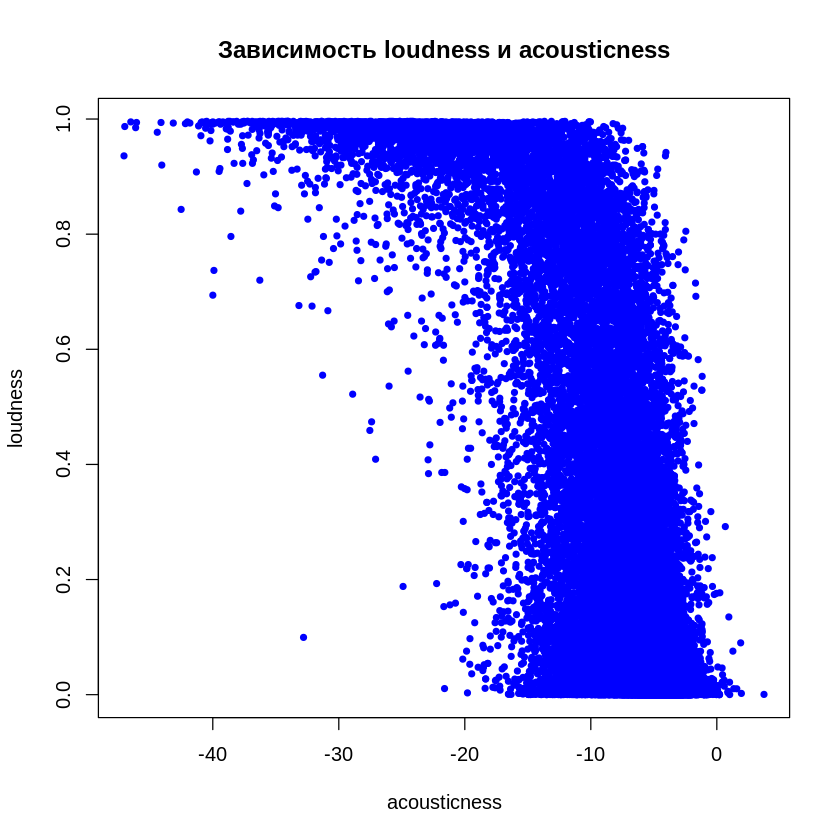

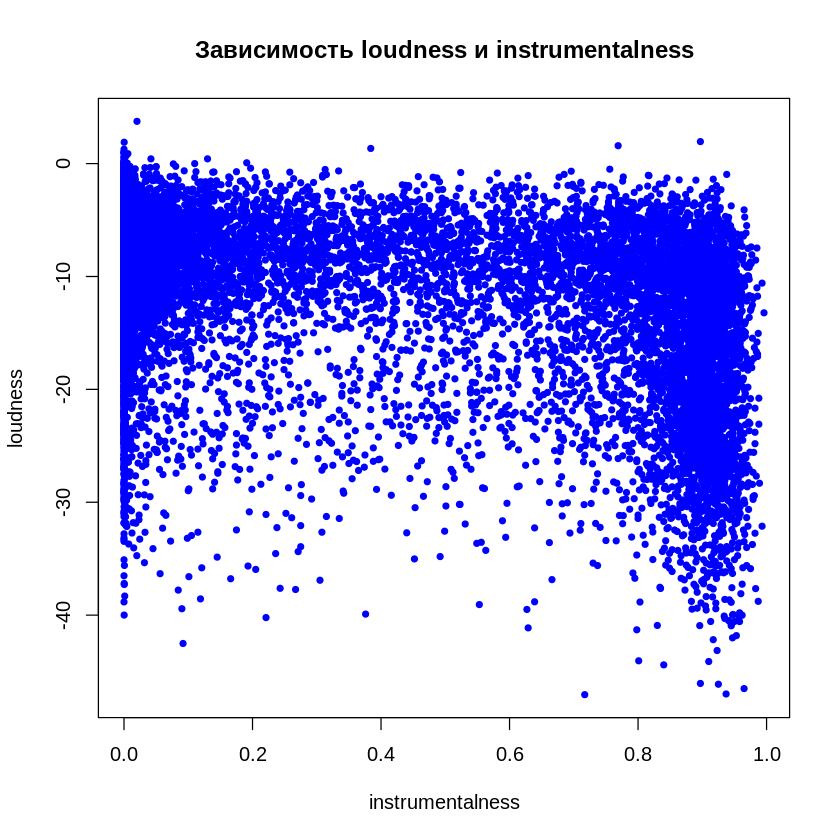

In [ ]:
plot(music_frame$acousticness, music_frame$energy, pch=20, col = "blue", main="Зависимость energy и acousticness", xlab = "acousticness", ylab = "energy")
plot(music_frame$loudness, music_frame$acousticness, pch=20, col = "blue", main="Зависимость loudness и acousticness", xlab = "acousticness", ylab = "loudness")
plot(music_frame$instrumentalness, music_frame$loudness, pch=20, col = "blue", main="Зависимость loudness и instrumentalness", xlab = "instrumentalness", ylab = "loudness")

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

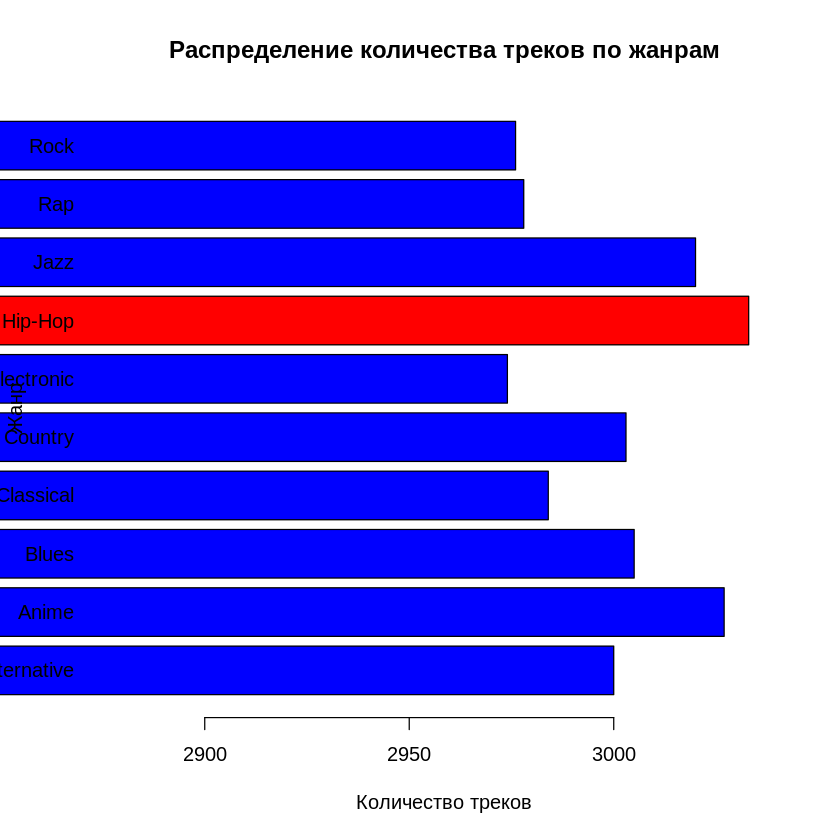

In [ ]:
music_c <- music_frame
music_c$single <- 1

music_c <- music_c %>%
                group_by(music_genre) %>%
                summarise(amount = sum(single))

max_value <- max(music_c$amount)
min_value <- min(music_c$amount)

RedBluePalette = list()
for (i in 1:nrow(music_c)) {
  if (music_c$amount[i] == max_value) {
    RedBluePalette <- append(RedBluePalette, '#FF0000')
  }
  else{
    RedBluePalette <- append(RedBluePalette, '#0000FF')
  }
}
RedBluePalette <- unlist(RedBluePalette, recursive = TRUE, use.names = FALSE)

barplot(music_c$amount, names.arg = music_c$music_genre, xlim = range((min_value - 100) : (max_value + 10)), ylab="Жанр", xlab="Количество треков", las = 1,
        col = RedBluePalette, horiz = TRUE, main = "Распределение количества треков по жанрам")

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

`summarise()` has grouped output by 'artist_name'. You can override using the
`.groups` argument.
Joining, by = c("artist_name", "music_genre", "total")
Joining, by = c("artist_name", "music_genre", "total")


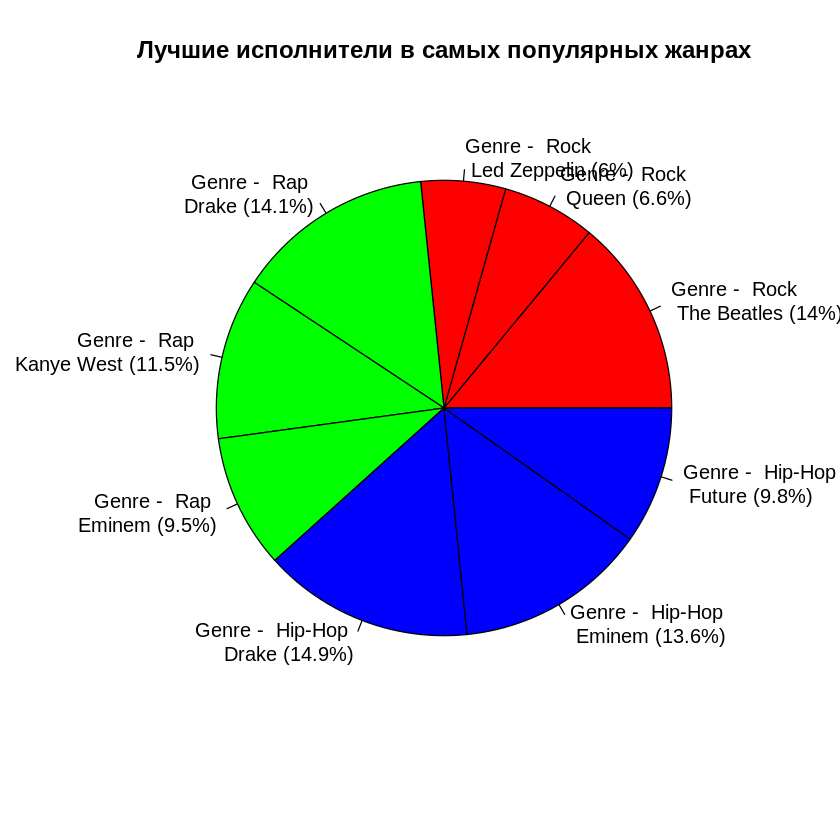

In [ ]:
top_genres <- music
top_artists <- music
top_artists <- top_artists[top_artists$artist_name != 'empty_field', ]

top_genres <- top_genres %>%
                group_by(music_genre) %>%
                summarise(total = sum(popularity))

top_genres <- head(top_genres[order(top_genres$total, decreasing = TRUE), ], 3)

top_artists <- top_artists[top_artists$music_genre %in% top_genres$music_genre, ]
top_artists <- top_artists %>%
                group_by(artist_name, music_genre) %>%
                summarise(total = sum(popularity))
top_artists <-top_artists[order(top_artists$music_genre, top_artists$total, decreasing = TRUE), ]

top_artists_rock <- head(top_artists, 3)
top_artists_rap <- head(top_artists[(top_artists$music_genre != 'Hip-Hop') & (top_artists$music_genre != 'Rock'), ], 3)
top_artists_hip_hop <- head(top_artists[(top_artists$music_genre != 'Rap') & (top_artists$music_genre != 'Rock'), ], 3)

artists_result <- top_artists_rock%>%
                    full_join(top_artists_rap)
artists_result <- artists_result%>%
                    full_join(top_artists_hip_hop)

genres_result <- artists_result %>%
                  group_by(music_genre) %>%
                  summarise(total = sum(total))
genres_result <- genres_result[order(genres_result$music_genre, decreasing = TRUE), ]

colours <- c('#FF0000', '#FF0000', '#FF0000', '#00FF00', '#00FF00', '#00FF00', '#0000FF', '#0000FF', '#0000FF')
percentage <- 100 * artists_result$total / sum(artists_result$total)
percentage <- round(percentage, digits = 1)
artists_result$artist_name <- paste(artists_result$artist_name, " (", percentage, "%)", sep = "")
artists_result$artist_name <- paste("Genre - ", artists_result$music_genre, "\n", artists_result$artist_name)

pie(artists_result$total, labels = artists_result$artist_name, col = colours, main="Лучшие исполнители в самых популярных жанрах")

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

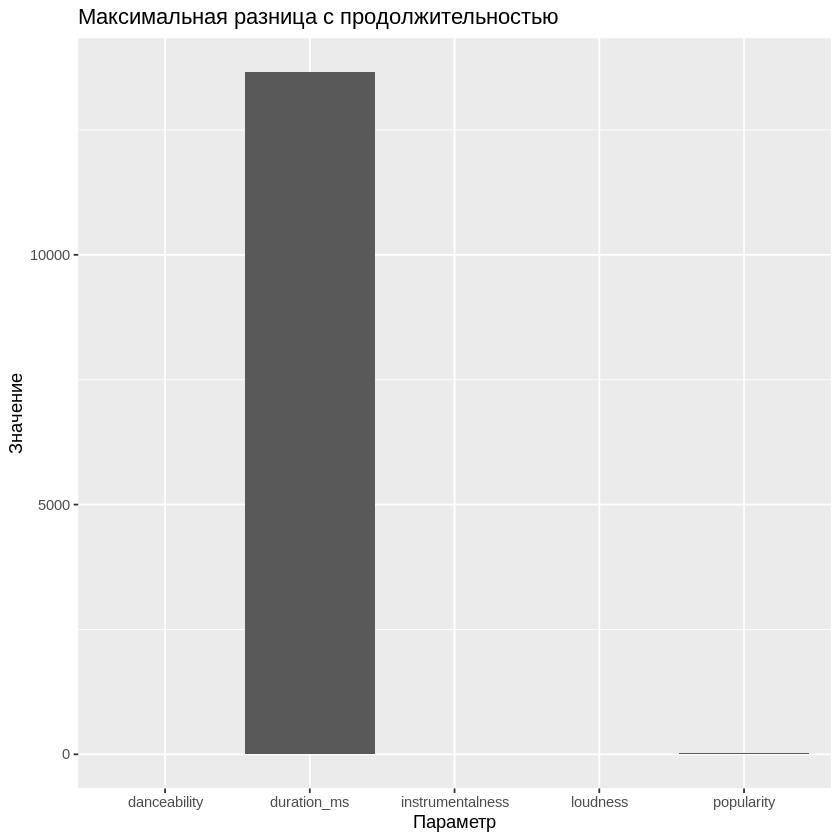

In [ ]:
two_condition <- music
two_condition <- two_condition %>%
                  group_by(music_genre) %>%
                  summarise(total = sum(popularity))
two_condition <- two_condition[order(two_condition$total, decreasing = TRUE), ]

max <- max(two_condition$total)
min <- min(two_condition$total)

two_condition <- two_condition[((two_condition$total == max) | (two_condition$total == min)), ]

parameters <- music
parameters <- parameters[parameters$music_genre %in% two_condition$music_genre, ]
parameters <- parameters %>%
                 group_by(music_genre) %>%
                 summarise_at(vars(popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, valence), mean)

genres <- two_condition$music_genre

parameters_t <- as.data.frame(t(parameters[ , 2:10]))
colnames(parameters_t) <- rev(genres)
parameters_t$difference <- apply(parameters_t, 1, function(x) abs(x[1]-x[2]))
parameters_t <- parameters_t[order(parameters_t$difference, decreasing = TRUE), ]

max_difference <- head(parameters_t, 5)
parameters_t <- parameters_t[2:10, ]
max_difference_no_duration <- head(parameters_t, 4)
min_difference <- tail(parameters_t, 5)
min_difference <- na.omit(min_difference)

ggplot(max_difference, aes(x = rownames(max_difference), y = difference)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Максимальная разница c продолжительностью")

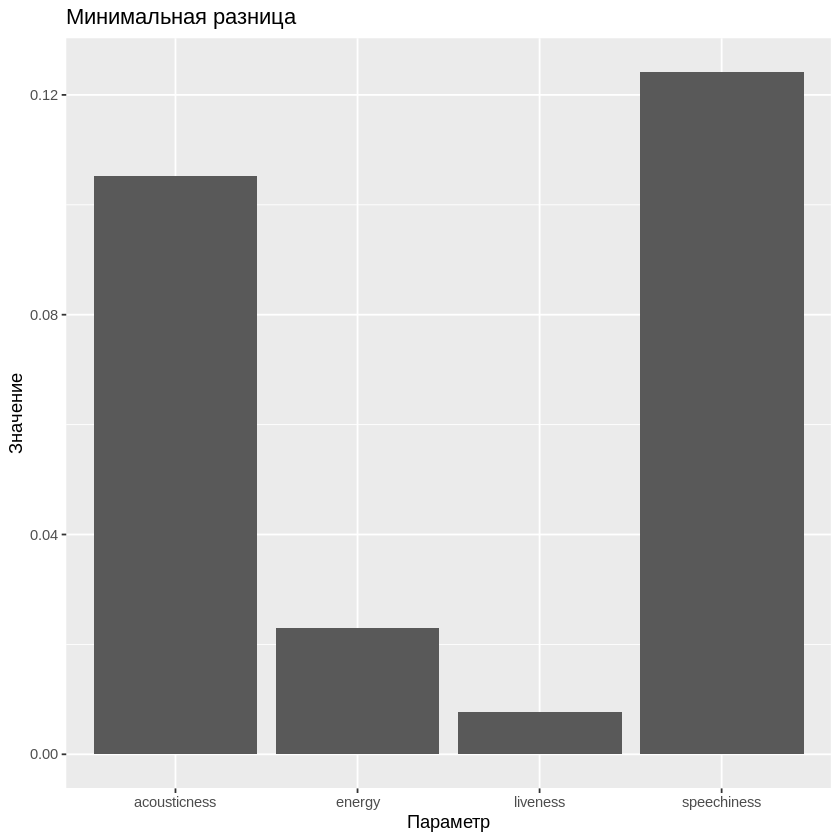

In [ ]:
ggplot(min_difference, aes(x = rownames(min_difference), y = difference)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Минимальная разница")

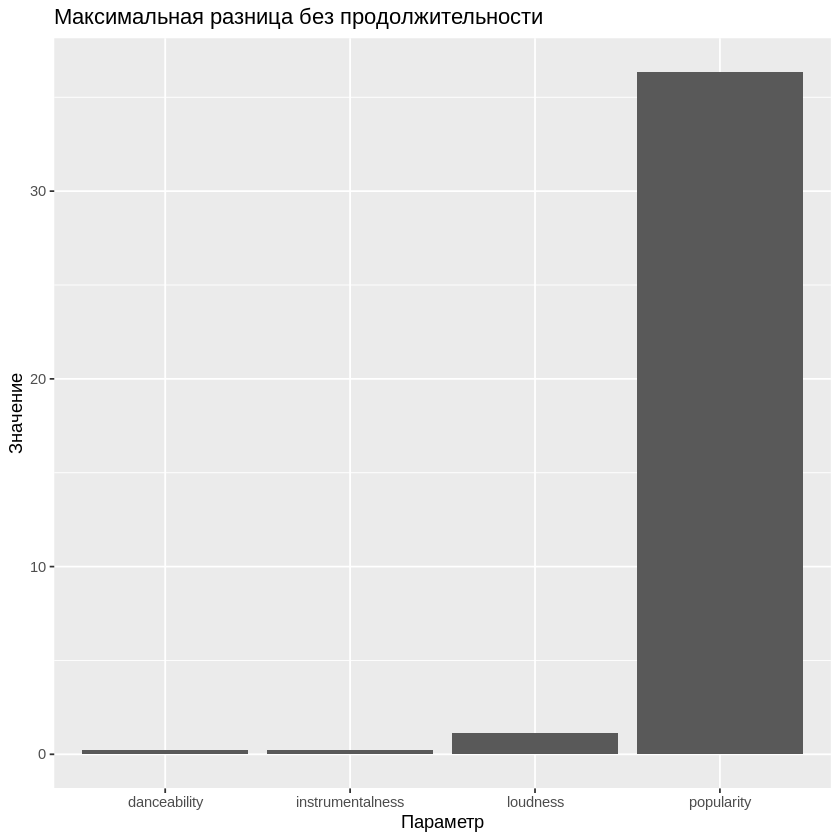

In [ ]:
ggplot(max_difference_no_duration, aes(x = rownames(max_difference_no_duration), y = difference)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Максимальная разница без продолжительности")

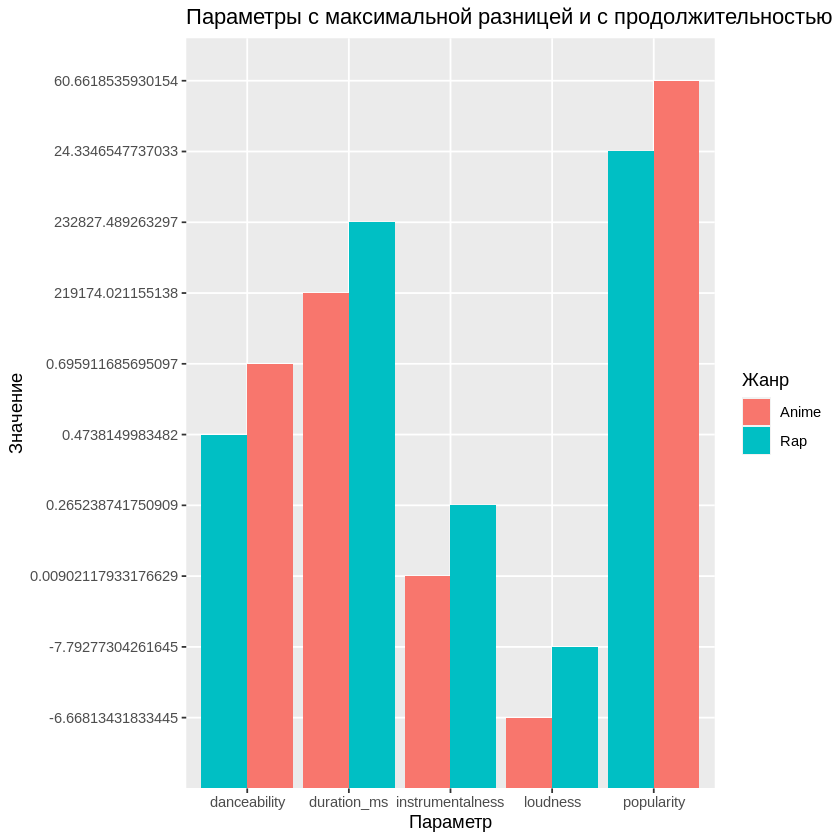

In [ ]:
df1 <- data.frame(music_genre=character(), param=character(), value=character(), stringsAsFactors=TRUE)
row_names <- rownames(max_difference)
for(i in 1:nrow(max_difference)) {
  df1 <- rbind(df1, c(genres[1], row_names[i], max_difference[i,1]))
  df1 <- rbind(df1, c(genres[2], row_names[i], max_difference[i,2]))
}
colnames(df1) <- c('music_genre', 'param', 'value')

ggplot(df1, aes(x=param, y=value, fill=music_genre)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_discrete(name = "Жанр") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Параметры с максимальной разницей и с продолжительностью")

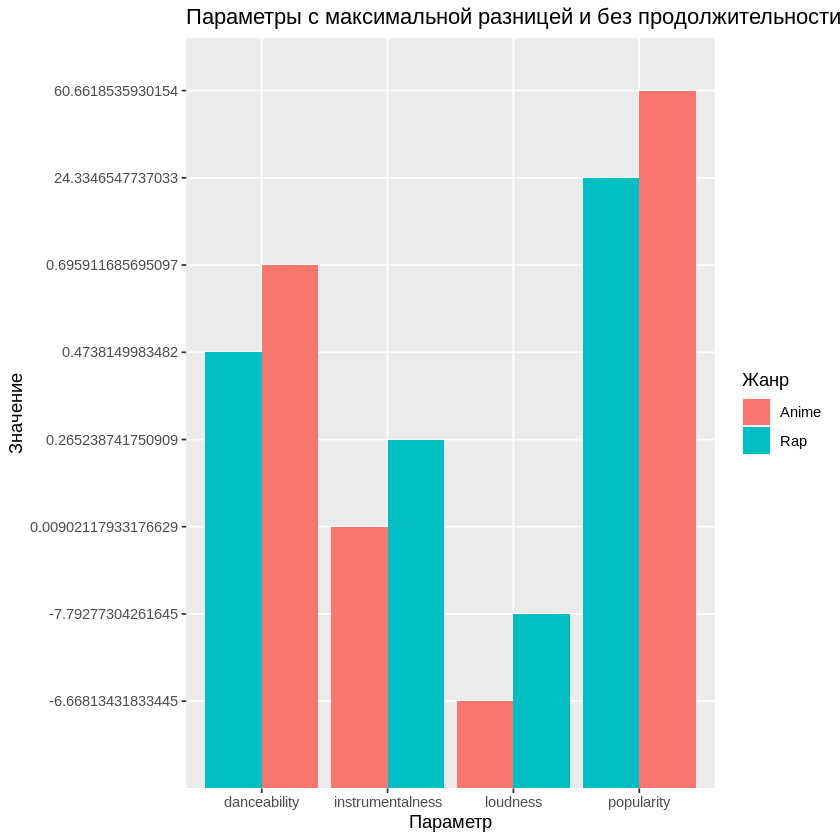

In [ ]:
df2 <- data.frame(music_genre=character(), param=character(), value=character(), stringsAsFactors=TRUE)
row_names <- rownames(max_difference_no_duration)
for(i in 1:nrow(max_difference_no_duration)) {
  df2 <- rbind(df2, c(genres[1], row_names[i], max_difference_no_duration[i,1]))
  df2 <- rbind(df2, c(genres[2], row_names[i], max_difference_no_duration[i,2]))
}
colnames(df2) <- c('music_genre', 'param', 'value')

ggplot(df2, aes(x=param, y=value, fill=music_genre)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_discrete(name = "Жанр") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Параметры с максимальной разницей и без продолжительности")

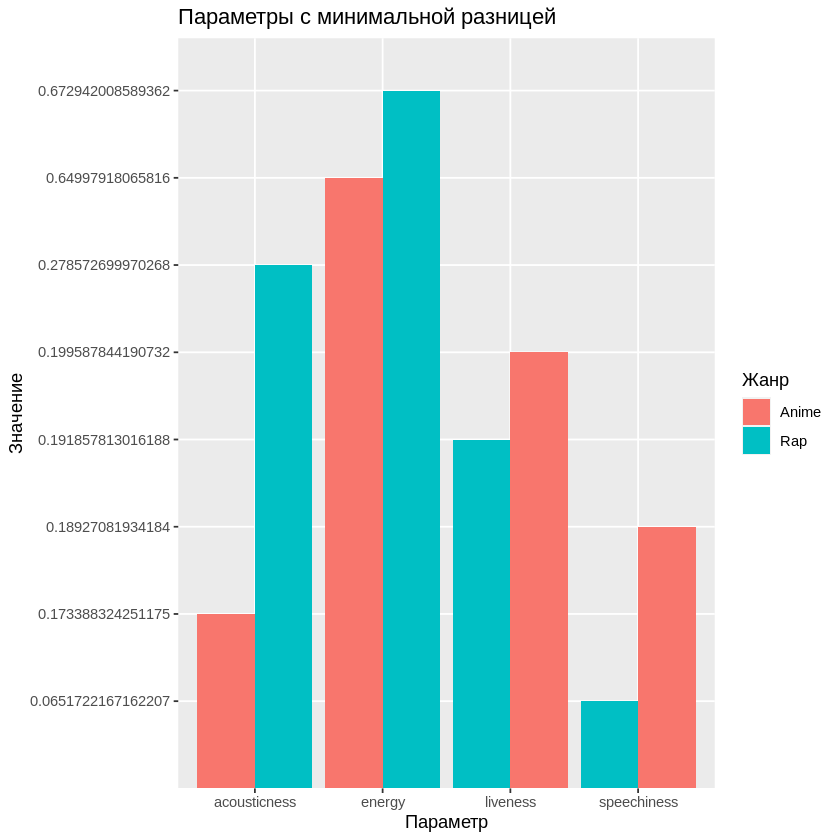

In [ ]:
df3 <- data.frame(music_genre=character(), param=character(), value=character(), stringsAsFactors=TRUE)
row_names <- rownames(min_difference)
for(i in 1:nrow(min_difference)) {
  df3 <- rbind(df3, c(genres[1], row_names[i], min_difference[i,1]))
  df3 <- rbind(df3, c(genres[2], row_names[i], min_difference[i,2]))
}
colnames(df3) <- c('music_genre', 'param', 'value')

ggplot(df3, aes(x=param, y=value, fill=music_genre)) +
  geom_bar(stat="identity",position="dodge") +
  scale_fill_discrete(name="Жанр") +
  xlab("Параметр") + ylab("Значение") +
  ggtitle("Параметры с минимальной разницей")

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

[1] "Графики плотности распределения громкости по длительности"


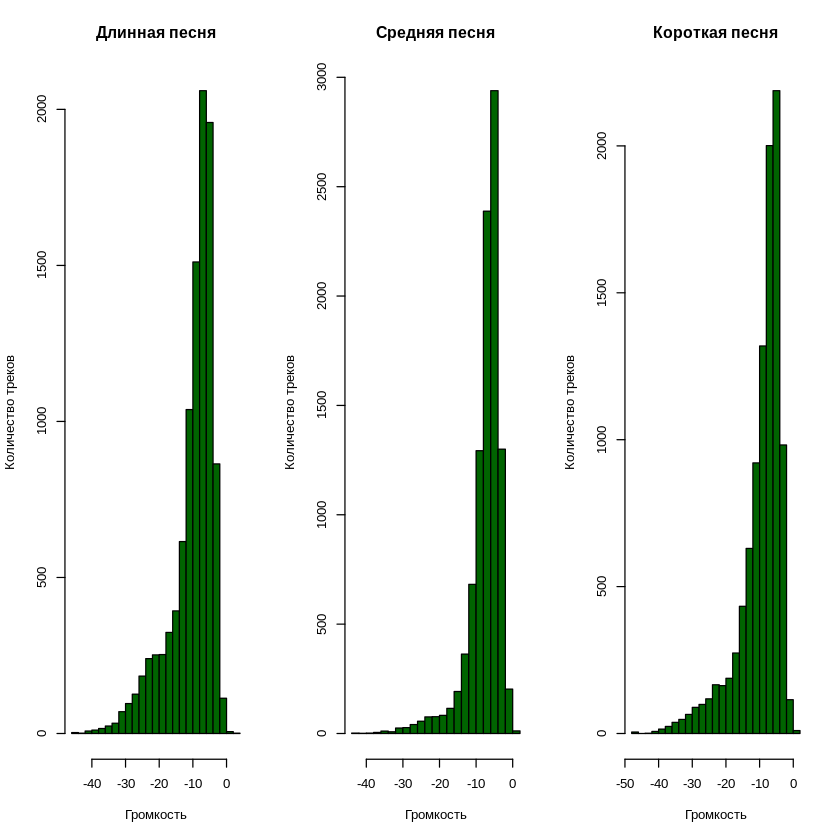

In [ ]:
music_frame_c <- music[c('duration_ms','loudness')]

percentiles <- quantile(music_frame_c$duration_ms, c(.33, .66), na.rm = TRUE)

getTrackDuration = function(x){
  ret = '';
  if(x[1] < percentiles[1])
    ret = 'Короткая'
  else {
    if(x[1] > percentiles[2])
      ret = 'Длинная'
    else
       ret = 'Средняя'
  }
  return(ret)
}

music_frame_c$track_duration <- apply(music_frame_c, 1, getTrackDuration)

print("Графики плотности распределения громкости по длительности")
dict_track_dur <- c('Длинная', 'Средняя', 'Короткая')
par(mfrow=c(1,3))
for(type in dict_track_dur) {
  temp <- music_frame_c[music_frame_c$track_duration == type, ]
  hist(temp$loudness, breaks = 20,
    main=paste(type, "песня"), xlab="Громкость", ylab="Количество треков", col="darkgreen")
}

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

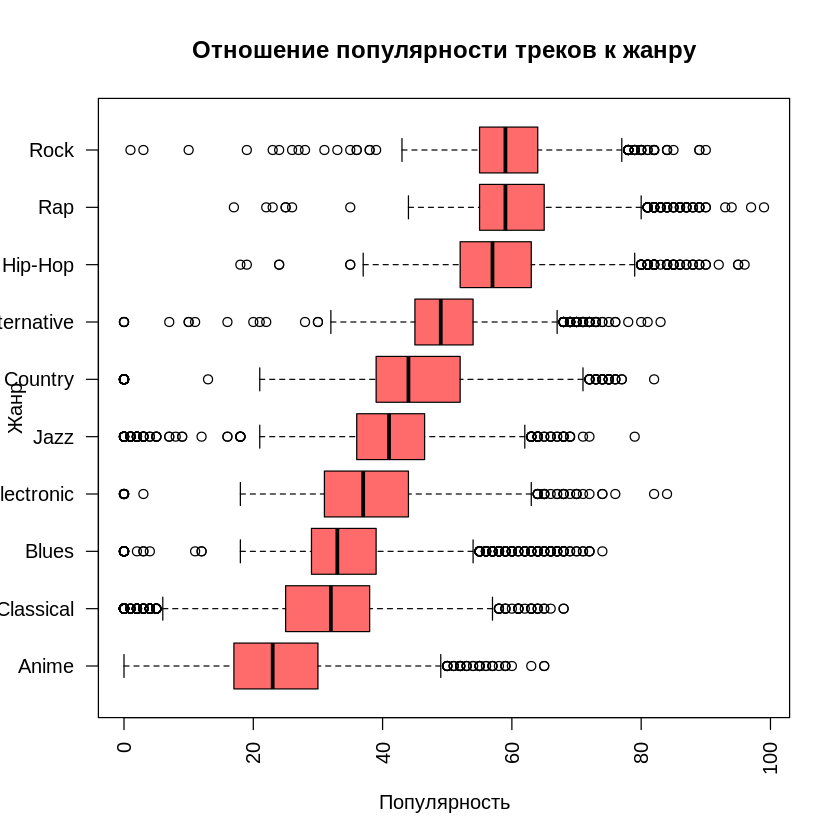

In [ ]:
music_frame_copy <- music[c('music_genre','popularity')]

new_order <- with(music_frame_copy, reorder(music_genre , popularity, median))

boxplot(music_frame_copy$popularity ~ new_order, main = "Отношение популярности треков к жанру", xlab = "Популярность", ylab = "Жанр",
 las=2, col = "indianred1", horizontal = TRUE)

Можно заметить, что жанры Rap, Rock и Hip-Hop имеют практически идентичные ящики, что может свидетельствовать об их некотором сходстве.

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

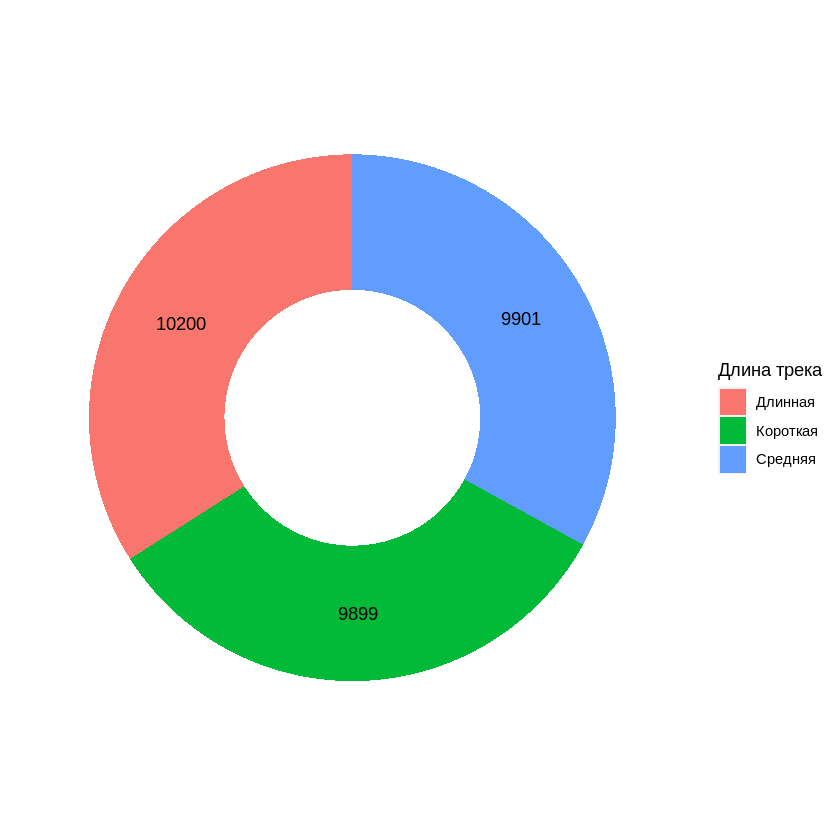

In [ ]:
music_frame_co <- music_frame_c %>% count(track_duration, sort=TRUE)

hsize = 1.5
ggplot(music_frame_co, aes(x = hsize, y = n, fill = track_duration)) +
  geom_col() +
  geom_text(aes(label = n), position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  xlim(c(0.2, hsize + 0.5)) +
  guides(fill = guide_legend(title = "Длина трека")) +
  theme(panel.background = element_rect(fill = "white"),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())